In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import seaborn as sns
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
train = pd.read_csv('train.csv',index_col=0)
test = pd.read_csv('test.csv',index_col=0)
sample = pd.read_csv('sample.csv')


In [ ]:
test.shape

(13234, 7)

In [ ]:
test

,timestamp,A_x,A_y,A_z,B_x,B_y,B_z
0,2000-01-01 00:00:42.700,-1.000957,-0.170691,0.124889,-0.979561,0.003150,-0.264673
1,2000-01-01 00:28:38.540,-0.874830,0.132696,-0.501727,-1.274911,0.045122,0.121270
2,2000-01-01 00:07:23.900,-1.219112,0.074678,0.435331,-0.860820,0.222740,0.008689
3,2019-01-12 01:58:44.580,-0.907752,-0.171816,0.211507,-0.972017,0.337799,1.013534
4,2019-01-12 00:59:32.380,-1.031261,0.000340,-0.091693,-0.217434,-0.323466,0.931614
...,...,...,...,...,...,...,...
13229,2000-01-01 00:29:09.700,-1.379061,0.070504,-0.528339,-1.154145,0.097546,-0.537505
13230,2019-01-12 02:01:14.700,-1.039895,-0.122421,0.065954,-1.152930,0.294010,1.080373
13231,2000-01-01 00:28:28.560,-1.176883,-0.218801,-0.581625,-0.809665,0.126385,0.314077
13232,2000-01-01 00:26:53.240,-0.912287,-0.148846,-0.141693,-1.382983,0.102818,0.933066


In [ ]:
train.isna().sum(),train.shape

(timestamp        0
 A_x          10000
 A_y          10000
 A_z          10000
 B_x          10000
 B_y          10000
 B_z          10000
 label            0
 dtype: int64,
 (100000, 8))

In [ ]:
train.head(10)

,timestamp,A_x,A_y,A_z,B_x,B_y,B_z,label
0,2019-01-12 00:45:54.450,-0.259130,-0.834869,-0.485499,0.196409,NaN,0.384934,8
1,2000-01-01 01:37:06.440,0.370490,0.175042,0.122625,-0.338242,0.358245,0.126491,2
2,2019-01-12 00:45:33.900,-0.257837,-0.881947,-0.391895,0.196027,0.894537,0.411221,8
3,2000-01-01 00:46:22.680,-0.937753,-0.055961,0.362041,-0.929881,0.087673,0.134609,11
4,2000-01-01 00:49:56.620,-0.988320,-0.190390,0.157909,-0.954669,-0.024810,-0.388420,6
5,2000-01-01 01:34:24.140,-0.654583,0.068285,-0.029109,-0.176341,-0.256252,-0.510816,2
6,2000-01-01 00:34:58.180,-1.009269,0.003985,-0.263406,NaN,-0.325362,-0.131165,3
7,2019-01-12 00:50:47.040,NaN,0.984155,-0.231787,-0.114444,-0.973016,0.227619,8
8,2019-01-12 00:45:04.500,-0.257591,-0.851943,-0.438682,0.195110,0.901728,0.379608,8
9,2000-01-01 00:41:32.460,-0.984360,-0.182248,0.630760,NaN,0.044664,0.484233,10


In [ ]:
train.describe()

,A_x,A_y,A_z,B_x,B_y,B_z,label
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,100000.000000
mean,-0.876639,-0.110566,-0.013331,-0.780543,0.116559,0.167377,5.945630
std,0.464709,0.348463,0.361989,0.817925,0.593224,0.785482,3.333515
min,-5.132823,-1.949310,-1.284750,-7.483251,-5.466767,-7.208220,1.000000
25%,-1.016718,-0.181035,-0.281950,-1.050645,-0.190546,-0.243964,3.000000
50%,-0.958268,-0.047425,-0.063756,-0.918144,0.023954,0.113276,7.000000
75%,-0.764307,0.060235,0.222074,-0.157112,0.319651,0.525970,9.000000
max,1.849398,2.413866,2.584467,5.372528,7.182237,6.766558,11.000000


In [ ]:
train.isna().sum()

timestamp        0
A_x          10000
A_y          10000
A_z          10000
B_x          10000
B_y          10000
B_z          10000
label            0
dtype: int64

In [ ]:
cols = train.columns[1:-1]

In [ ]:
cols = train.columns[1:-1]
for i in range(1,12):
    for col in cols:
        mid = train[train['label']==i][col].median()
        train.loc[train['label']==i,col] = train[train['label']==i][col].fillna(mid)
        mid = train[train['label']==i][col].median()
        train.loc[train['label']==i,col] = train[train['label']==i][col].fillna(mid)

In [ ]:
train.isna().sum()

timestamp    0
A_x          0
A_y          0
A_z          0
B_x          0
B_y          0
B_z          0
label        0
dtype: int64

<Axes: >

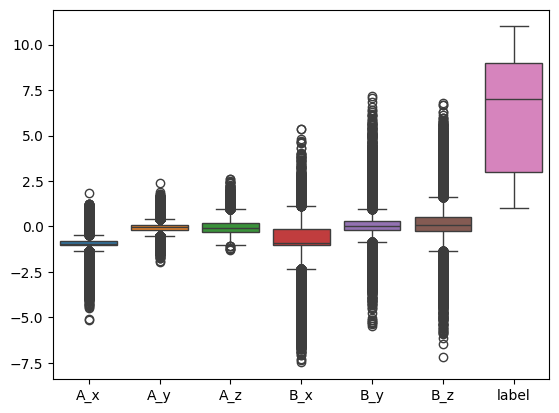

In [ ]:
sns.boxplot(train)

In [ ]:
print(train['B_x'].loc[train['B_x'].quantile(0.25)>train['B_x']].shape)
print(train['B_y'].loc[train['B_y'].quantile(0.25)>train['B_y']].shape)
print(train['B_z'].loc[train['B_z'].quantile(0.25)>train['B_z']].shape)
print(train['A_z'].loc[train['A_z'].quantile(0.25)>train['A_z']].shape)
print(train['A_y'].loc[train['A_y'].quantile(0.25)>train['A_y']].shape)
print(train['A_x'].loc[train['A_x'].quantile(0.25)>train['A_x']].shape)

#이상치

print()
print(train['B_x'].loc[train['B_x'].quantile(0.75)<train['B_x']].shape)
print(train['B_y'].loc[train['B_y'].quantile(0.75)<train['B_y']].shape)
print(train['B_z'].loc[train['B_z'].quantile(0.75)<train['B_z']].shape)
print(train['A_z'].loc[train['A_z'].quantile(0.75)<train['A_z']].shape)
print(train['A_y'].loc[train['A_y'].quantile(0.75)<train['A_y']].shape)
print(train['A_x'].loc[train['A_x'].quantile(0.75)<train['A_x']].shape)

(7552,)
(7552,)
(7552,)
(7552,)
(7486,)
(7393,)

(7552,)
(7552,)
(7552,)
(7552,)
(7402,)
(7552,)


In [ ]:
# sns.pairplot(train.iloc[:,1:])

In [ ]:
train['timestamp'] = pd.to_datetime(train['timestamp'])
train['hour'] = train['timestamp'].dt.hour
train

,timestamp,A_x,A_y,A_z,B_x,B_y,B_z,label,hour
0,2019-01-12 00:45:54.450,-0.259130,-0.834869,-0.485499,0.196409,0.903181,0.384934,8,0
1,2000-01-01 01:37:06.440,0.370490,0.175042,0.122625,-0.338242,0.358245,0.126491,2,1
2,2019-01-12 00:45:33.900,-0.257837,-0.881947,-0.391895,0.196027,0.894537,0.411221,8,0
3,2000-01-01 00:46:22.680,-0.937753,-0.055961,0.362041,-0.929881,0.087673,0.134609,11,0
4,2000-01-01 00:49:56.620,-0.988320,-0.190390,0.157909,-0.954669,-0.024810,-0.388420,6,0
...,...,...,...,...,...,...,...,...,...
99995,2000-01-01 00:25:51.300,-0.499562,0.012127,0.365746,-1.105581,-0.040284,-0.180426,10,0
99996,2000-01-01 01:37:53.120,-0.929146,0.063935,-0.362481,-0.951160,-0.047168,-0.344213,3,1
99997,2000-01-01 00:01:02.020,-0.940124,-0.301950,0.201120,-0.983245,-0.011691,-0.178657,6,0
99998,2000-01-01 00:31:54.960,-1.152895,-0.149863,-0.746005,-0.945021,-0.686593,0.317497,5,0


In [ ]:
test['timestamp'] = pd.to_datetime(test['timestamp'])
test['hour'] = test['timestamp'].dt.hour
test

,timestamp,A_x,A_y,A_z,B_x,B_y,B_z,hour
0,2000-01-01 00:00:42.700,-1.000957,-0.170691,0.124889,-0.979561,0.003150,-0.264673,0
1,2000-01-01 00:28:38.540,-0.874830,0.132696,-0.501727,-1.274911,0.045122,0.121270,0
2,2000-01-01 00:07:23.900,-1.219112,0.074678,0.435331,-0.860820,0.222740,0.008689,0
3,2019-01-12 01:58:44.580,-0.907752,-0.171816,0.211507,-0.972017,0.337799,1.013534,1
4,2019-01-12 00:59:32.380,-1.031261,0.000340,-0.091693,-0.217434,-0.323466,0.931614,0
...,...,...,...,...,...,...,...,...
13229,2000-01-01 00:29:09.700,-1.379061,0.070504,-0.528339,-1.154145,0.097546,-0.537505,0
13230,2019-01-12 02:01:14.700,-1.039895,-0.122421,0.065954,-1.152930,0.294010,1.080373,2
13231,2000-01-01 00:28:28.560,-1.176883,-0.218801,-0.581625,-0.809665,0.126385,0.314077,0
13232,2000-01-01 00:26:53.240,-0.912287,-0.148846,-0.141693,-1.382983,0.102818,0.933066,0


In [ ]:
# sns.heatmap(train.corr(),annot=True)

In [ ]:
target = 'label'
x_train = train.drop(target,axis=1)
y_train = train[target]

x_train.drop('timestamp',axis=1,inplace=True)
test.drop('timestamp',axis=1,inplace=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_s = scaler.fit_transform(x_train)
test_s = scaler.transform(test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

RF = RandomForestClassifier(random_state=1)

RF.fit(x_train_s, y_train)
pred_rf = RF.predict(test_s)

In [ ]:
RF.score(x_train_s,y_train)

1.0

In [ ]:
pred_rf = pd.DataFrame(pred_rf,columns=['label'])
pred_rf = pred_rf.reset_index()
pred_rf.columns = ['ID','label']
pred_rf.set_index('ID',inplace=True)
pred_rf.to_csv('result_rf.csv')

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

SVM = SVC(random_state=1)

SVM.fit(x_train_s, y_train)
pred_svm = SVM.predict(test_s)

In [ ]:
SVM.score(x_train_s,y_train)

0.86848

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

KNN = KNeighborsClassifier()

KNN.fit(x_train_s, y_train)
pred_knn = KNN.predict(test_s)

In [ ]:
KNN.score(x_train_s,y_train)

In [ ]:
pred_knn = pd.DataFrame(pred_rf,columns=['label'])
pred_knn = pred_rf.reset_index()
pred_knn.columns = ['ID','label']
pred_knn.set_index('ID',inplace=True)
pred_knn.to_csv('result_rf.csv')

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train_s, y_train, stratify=y_train, test_size=.2)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((80000, 7), (20000, 7), (80000,), (20000,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

KNN = KNeighborsClassifier()

KNN.fit(x_train, y_train)
pred_knn = KNN.predict(x_val)
print(classification_report(y_val, pred_knn))

              precision    recall  f1-score   support

           1       0.78      0.86      0.82      2293
           2       0.92      0.86      0.89      2434
           3       0.75      0.76      0.75      1661
           4       0.78      0.85      0.81      1442
           5       0.70      0.50      0.58      1082
           6       0.94      0.94      0.94      1076
           7       1.00      1.00      1.00      2119
           8       1.00      0.99      1.00      2299
           9       0.97      0.99      0.98      1856
          10       0.88      0.87      0.87      1916
          11       0.89      0.93      0.91      1822

    accuracy                           0.88     20000
   macro avg       0.87      0.87      0.87     20000
weighted avg       0.88      0.88      0.88     20000



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

SVM = SVC(kernel='rbf',C=100.0,random_state=1)

SVM.fit(x_train, y_train)
pred_svm = SVM.predict(x_val)
print(classification_report(y_val, pred_svm))


KeyboardInterrupt: 

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import seaborn as sns
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv',index_col=0)

In [ ]:
train['timestamp'] = pd.to_datetime(train['timestamp'])
test['timestamp'] = pd.to_datetime(test['timestamp'])


In [ ]:
train = train.sort_values(by='timestamp')

In [ ]:
train.columns

Index(['Unnamed: 0', 'timestamp', 'A_x', 'A_y', 'A_z', 'B_x', 'B_y', 'B_z',
       'label'],
      dtype='object')

##선형보간

In [ ]:
from scipy import interpolate
for i in train.columns[2:]:
  train[i] = train[i].interpolate(method='linear')

In [ ]:
train.isna().sum()

Unnamed: 0    0
timestamp     0
A_x           0
A_y           0
A_z           0
B_x           0
B_y           0
B_z           0
label         0
dtype: int64

## 중앙값 대체

In [ ]:
cols = train.columns[2:-1]
for i in range(1,12):
    for col in cols:
        mid = train[train['label']==i][col].median()
        train.loc[train['label']==i,col] = train[train['label']==i][col].fillna(mid)
        mid = train[train['label']==i][col].median()
        train.loc[train['label']==i,col] = train[train['label']==i][col].fillna(mid)

In [ ]:
train.shape

(100000, 9)

In [ ]:
train['ms'] = train['timestamp'].dt.microsecond//1000
train['s'] = train['timestamp'].dt.second
train['m'] = train['timestamp'].dt.minute
train['h'] = train['timestamp'].dt.hour
train['d'] = train['timestamp'].dt.day


test['ms'] = test['timestamp'].dt.microsecond//1000
test['s'] = test['timestamp'].dt.second
test['m'] = test['timestamp'].dt.minute
test['h'] = test['timestamp'].dt.hour
test['d'] = test['timestamp'].dt.day


train.drop('timestamp',axis=1, inplace=True)
test.drop('timestamp',axis=1, inplace=True)


KeyError: 'timestamp'

In [ ]:
x = train.drop(['Unnamed: 0','label'], axis=1)
y = train['label']
x.shape, y.shape

((100000, 11), (100000,))

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x,y,stratify=y, test_size=.2)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((80000, 11), (20000, 11), (80000,), (20000,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)
pred_rf = model_rf.predict(x_val)
print(classification_report(y_val, pred_rf))

              precision    recall  f1-score   support

           1       0.97      0.96      0.96      2293
           2       0.97      0.98      0.97      2434
           3       0.99      0.92      0.95      1661
           4       0.95      0.99      0.97      1442
           5       0.95      0.99      0.97      1082
           6       1.00      0.98      0.99      1076
           7       1.00      1.00      1.00      2119
           8       1.00      1.00      1.00      2299
           9       1.00      1.00      1.00      1856
          10       0.95      0.98      0.97      1916
          11       0.99      0.98      0.98      1822

    accuracy                           0.98     20000
   macro avg       0.98      0.98      0.98     20000
weighted avg       0.98      0.98      0.98     20000



In [ ]:
from xgboost import XGBClassifier
model_xgb= XGBClassifier()
model_xgb.fit(x_train, y_train-1)
pred_xgb = model_xgb.predict(x_val)
print(classification_report(y_val, pred_xgb+1))


              precision    recall  f1-score   support

           1       0.99      0.99      0.99      2293
           2       0.99      0.99      0.99      2434
           3       1.00      0.99      0.99      1661
           4       0.99      1.00      0.99      1442
           5       0.99      1.00      0.99      1082
           6       1.00      1.00      1.00      1076
           7       1.00      1.00      1.00      2119
           8       1.00      1.00      1.00      2299
           9       1.00      1.00      1.00      1856
          10       0.99      0.99      0.99      1916
          11       1.00      1.00      1.00      1822

    accuracy                           1.00     20000
   macro avg       0.99      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [ ]:
pred_xgb = model_xgb.predict(test)
pred_xgb = pd.DataFrame(pred_xgb+1,columns=['label'])
pred_xgb = pred_xgb.reset_index()
pred_xgb.columns = ['ID','label']
pred_xgb.set_index('ID',inplace=True)
pred_xgb.to_csv('pred_xgb.csv')

In [ ]:
from lightgbm import LGBMClassifier

model_lgbm = LGBMClassifier()
model_lgbm.fit(x_train, y_train)
pred_lgbm = model_lgbm.predict(x_val)
print(classification_report(y_val, pred_lgbm))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1750
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 11
[LightGBM] [Info] Start training from score -2.165871
[LightGBM] [Info] Start training from score -2.106196
[LightGBM] [Info] Start training from score -2.488312
[LightGBM] [Info] Start training from score -2.630048
[LightGBM] [Info] Start training from score -2.916690
[LightGBM] [Info] Start training from score -2.923179
[LightGBM] [Info] Start training from score -2.244906
[LightGBM] [Info] Start training from score -2.163041
[LightGBM] [Info] Start training from score -2.377039
[LightGBM] [Info] Start training from score -2.345623
[LightGBM] [Info] Start training from score -2.395523
              precision    recall  f1-score   support

In [ ]:
pred_lgbm = model_lgbm.predict(test)
pred_lgbm = pd.DataFrame(pred_lgbm,columns=['label'])
pred_lgbm = pred_lgbm.reset_index()
pred_lgbm.columns = ['ID','label']
pred_lgbm.set_index('ID',inplace=True)
pred_lgbm.to_csv('pred_lgbm.csv')

## Standard scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()

x_train_ss = s_scaler.fit_transform(x_train)
x_val_ss = s_scaler.transform(x_val)
test_ss = s_scaler.transform(test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

model_rf_ss = RandomForestClassifier()
model_rf_ss.fit(x_train_ss, y_train)
pred_rf_ss = model_rf_ss.predict(x_val_ss)
print(classification_report(y_val, pred_rf_ss))

              precision    recall  f1-score   support

           1       0.97      0.96      0.97      2293
           2       0.97      0.98      0.98      2434
           3       0.99      0.92      0.96      1661
           4       0.95      0.99      0.97      1442
           5       0.95      0.99      0.97      1082
           6       1.00      0.98      0.99      1076
           7       1.00      1.00      1.00      2119
           8       1.00      1.00      1.00      2299
           9       1.00      1.00      1.00      1856
          10       0.95      0.98      0.97      1916
          11       0.99      0.98      0.98      1822

    accuracy                           0.98     20000
   macro avg       0.98      0.98      0.98     20000
weighted avg       0.98      0.98      0.98     20000



In [ ]:
from xgboost import XGBClassifier
model_xgb_ss= XGBClassifier()
model_xgb_ss.fit(x_train_ss, y_train-1)
pred_xgb_ss = model_xgb_ss.predict(x_val_ss)
print(classification_report(y_val, pred_xgb_ss+1))


              precision    recall  f1-score   support

           1       0.99      0.98      0.99      2293
           2       0.99      0.99      0.99      2434
           3       1.00      0.98      0.99      1661
           4       0.99      1.00      0.99      1442
           5       0.99      1.00      0.99      1082
           6       1.00      1.00      1.00      1076
           7       1.00      1.00      1.00      2119
           8       1.00      1.00      1.00      2299
           9       1.00      1.00      1.00      1856
          10       0.99      0.99      0.99      1916
          11       1.00      1.00      1.00      1822

    accuracy                           1.00     20000
   macro avg       0.99      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [ ]:
pred_xgb_ss = model_xgb_ss.predict(test_ss)
pred_xgb_ss = pd.DataFrame(pred_xgb_ss+1,columns=['label'])
pred_xgb_ss = pred_xgb_ss.reset_index()
pred_xgb_ss.columns = ['ID','label']
pred_xgb_ss.set_index('ID',inplace=True)
pred_xgb_ss.to_csv('pred_xgb_ss.csv')

In [ ]:
from lightgbm import LGBMClassifier

model_lgbm_ss = LGBMClassifier()
model_lgbm_ss.fit(x_train_ss, y_train)
pred_lgbm_ss = model_lgbm_ss.predict(x_val_ss)
print(classification_report(y_val, pred_lgbm_ss))
accuracy_score(y_val, pred_lgbm_ss)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023370 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1754
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 11
[LightGBM] [Info] Start training from score -2.165871
[LightGBM] [Info] Start training from score -2.106196
[LightGBM] [Info] Start training from score -2.488312
[LightGBM] [Info] Start training from score -2.630048
[LightGBM] [Info] Start training from score -2.916690
[LightGBM] [Info] Start training from score -2.923179
[LightGBM] [Info] Start training from score -2.244906
[LightGBM] [Info] Start training from score -2.163041
[LightGBM] [Info] Start training from score -2.377039
[LightGBM] [Info] Start training from score -2.345623
[LightGBM] [Info] Start training from score -2.395523
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      2293
        

0.99535

In [ ]:
pred_lgbm_ss = model_lgbm_ss.predict(test_ss)
pred_lgbm_ss = pd.DataFrame(pred_lgbm_ss,columns=['label'])
pred_lgbm_ss = pred_lgbm_ss.reset_index()
pred_lgbm_ss.columns = ['ID','label']
pred_lgbm_ss.set_index('ID',inplace=True)
pred_lgbm_ss.to_csv('pred_lgbm_ss.csv')

## Minmax Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
m_scaler = MinMaxScaler()
x_train_ms = m_scaler.fit_transform(x_train)
x_val_ms = m_scaler.transform(x_val)
test_ms = m_scaler.transform(test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

model_rf_ms = RandomForestClassifier()
model_rf_ms.fit(x_train_ms, y_train)
pred_rf_ms = model_rf_ms.predict(x_val_ms)
print(classification_report(y_val, pred_rf_ms))
accuracy_score(y_val, pred_rf_ms)


              precision    recall  f1-score   support

           1       0.97      0.96      0.96      2293
           2       0.97      0.97      0.97      2434
           3       0.99      0.93      0.96      1661
           4       0.95      0.99      0.97      1442
           5       0.95      0.99      0.97      1082
           6       1.00      0.98      0.99      1076
           7       1.00      1.00      1.00      2119
           8       1.00      1.00      1.00      2299
           9       1.00      1.00      1.00      1856
          10       0.95      0.98      0.97      1916
          11       0.98      0.98      0.98      1822

    accuracy                           0.98     20000
   macro avg       0.98      0.98      0.98     20000
weighted avg       0.98      0.98      0.98     20000



0.9796

In [ ]:
from xgboost import XGBClassifier
model_xgb_ms= XGBClassifier()
model_xgb_ms.fit(x_train_ms, y_train-1)
pred_xgb_ms = model_xgb_ms.predict(x_val_ms)
print(classification_report(y_val, pred_xgb_ms+1))
accuracy_score(y_val, pred_xgb_ms+1)


              precision    recall  f1-score   support

           1       0.99      0.99      0.99      2293
           2       0.99      0.99      0.99      2434
           3       1.00      0.98      0.99      1661
           4       0.99      1.00      0.99      1442
           5       0.99      1.00      0.99      1082
           6       1.00      1.00      1.00      1076
           7       1.00      1.00      1.00      2119
           8       1.00      1.00      1.00      2299
           9       1.00      1.00      1.00      1856
          10       0.99      1.00      0.99      1916
          11       1.00      1.00      1.00      1822

    accuracy                           1.00     20000
   macro avg       0.99      1.00      0.99     20000
weighted avg       1.00      1.00      1.00     20000



0.99505

In [ ]:
pred_xgb_ms = model_xgb_ms.predict(test_ms)
pred_xgb_ms = pd.DataFrame(pred_xgb_ms+1,columns=['label'])
pred_xgb_ms = pred_lgbm_ss.reset_index()
pred_xgb_ms.columns = ['ID','label']
pred_xgb_ms.set_index('ID',inplace=True)
pred_xgb_ms.to_csv('pred_xgb_ms.csv')

In [ ]:
from lightgbm import LGBMClassifier

model_lgbm_ms = LGBMClassifier()
model_lgbm_ms.fit(x_train_ms, y_train)
pred_lgbm_ms = model_lgbm_ms.predict(x_val_ms)
print(classification_report(y_val, pred_lgbm_ms))
accuracy_score(y_val, pred_lgbm_ms)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021767 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1749
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 11
[LightGBM] [Info] Start training from score -2.165871
[LightGBM] [Info] Start training from score -2.106196
[LightGBM] [Info] Start training from score -2.488312
[LightGBM] [Info] Start training from score -2.630048
[LightGBM] [Info] Start training from score -2.916690
[LightGBM] [Info] Start training from score -2.923179
[LightGBM] [Info] Start training from score -2.244906
[LightGBM] [Info] Start training from score -2.163041
[LightGBM] [Info] Start training from score -2.377039
[LightGBM] [Info] Start training from score -2.345623
[LightGBM] [Info] Start training from score -2.395523
[LightGBM] [Warning] No further splits with positive 

0.9954

In [ ]:
pred_lgbm_ms = model_lgbm_ms.predict(test_ms)
pred_lgbm_ms = pd.DataFrame(pred_lgbm_ms,columns=['label'])
pred_lgbm_ms = pred_lgbm_ms.reset_index()
pred_lgbm_ms.columns = ['ID','label']
pred_lgbm_ms.set_index('ID',inplace=True)
pred_lgbm_ms.to_csv('pred_lgbm_ms.csv')

In [ ]:
# !pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.9/379.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 6.0 MB/s eta 0:00:00


In [ ]:
import optuna
from optuna import Trial
from optuna.samplers import TPESampler

In [ ]:
def objective(trial):
    param = {
        "objective": "multiclass",
        "metric": "multi_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "num_class": 3,
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }
    gbm = LGBMClassifier(**param)
    gbm.fit(x_train_ms, y_train)
    preds = gbm.predict(x_val_ms)
    accuracy = accuracy_score(y_val, preds)
    return accuracy

In [ ]:
sampler = TPESampler(seed=1)
study = optuna.create_study(study_name="lightgbm", direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=100)

[I 2024-03-30 08:41:03,140] A new study created in memory with name: lightgbm
[I 2024-03-30 08:41:13,832] Trial 0 finished with value: 0.8821 and parameters: {'lambda_l1': 5.6649755830282306e-05, 'lambda_l2': 0.030403280126677572, 'num_leaves': 2, 'feature_fraction': 0.5813995435791038, 'bagging_fraction': 0.48805353449026784, 'bagging_freq': 1, 'min_child_samples': 22}. Best is trial 0 with value: 0.8821.
[I 2024-03-30 08:41:36,851] Trial 1 finished with value: 0.9958 and parameters: {'lambda_l1': 1.2883876209377052e-05, 'lambda_l2': 3.72312200494449e-05, 'num_leaves': 139, 'feature_fraction': 0.6515167086419769, 'bagging_fraction': 0.8111317002380557, 'bagging_freq': 2, 'min_child_samples': 89}. Best is trial 1 with value: 0.9958.
[I 2024-03-30 08:41:54,820] Trial 2 finished with value: 0.9946 and parameters: {'lambda_l1': 1.763958399884789e-08, 'lambda_l2': 0.010819509974097813, 'num_leaves': 108, 'feature_fraction': 0.735213897067451, 'bagging_fraction': 0.4842321631571403, 'baggin

In [ ]:
print('Best parameters:', study.best_params)
print('Best value:', study.best_value)
print('Best trial:', study.best_trial)

Best parameters: {'lambda_l1': 0.00017983171185328469, 'lambda_l2': 8.687189899995208e-08, 'num_leaves': 177, 'feature_fraction': 0.630665003404627, 'bagging_fraction': 0.9446793821237338, 'bagging_freq': 1, 'min_child_samples': 37}
Best value: 0.9962
Best trial: FrozenTrial(number=84, state=TrialState.COMPLETE, values=[0.9962], datetime_start=datetime.datetime(2024, 3, 30, 9, 8, 40, 485926), datetime_complete=datetime.datetime(2024, 3, 30, 9, 8, 58, 576435), params={'lambda_l1': 0.00017983171185328469, 'lambda_l2': 8.687189899995208e-08, 'num_leaves': 177, 'feature_fraction': 0.630665003404627, 'bagging_fraction': 0.9446793821237338, 'bagging_freq': 1, 'min_child_samples': 37}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'lambda_l1': FloatDistribution(high=10.0, log=True, low=1e-08, step=None), 'lambda_l2': FloatDistribution(high=10.0, log=True, low=1e-08, step=None), 'num_leaves': IntDistribution(high=256, log=False, low=2, step=1), 'feature_fraction': Floa

In [ ]:
model = LGBMClassifier(**study.best_params)
model.fit(x_train_ms, y_train)
y_pred = model.predict(x_val_ms)

[LightGBM] [Warning] feature_fraction is set=0.630665003404627, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.630665003404627
[LightGBM] [Warning] lambda_l2 is set=8.687189899995208e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.687189899995208e-08
[LightGBM] [Warning] lambda_l1 is set=0.00017983171185328469, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00017983171185328469
[LightGBM] [Warning] bagging_fraction is set=0.9446793821237338, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9446793821237338
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.630665003404627, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.630665003404627
[LightGBM] [Warning] lambda_l2 is set=8.687189899995208e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.687189899995208e-08
[LightGBM] [Warning]

In [ ]:
accuracy_score(y_val, y_pred)

0.9962

In [ ]:
pred_lgbm_ms = model.predict(test_ms)
pred_lgbm_ms = pd.DataFrame(pred_lgbm_ms,columns=['label'])
pred_lgbm_ms = pred_lgbm_ms.reset_index()
pred_lgbm_ms.columns = ['ID','label']
pred_lgbm_ms.set_index('ID',inplace=True)
pred_lgbm_ms.to_csv('pred_lgbm_ms.csv')

[LightGBM] [Warning] feature_fraction is set=0.630665003404627, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.630665003404627
[LightGBM] [Warning] lambda_l2 is set=8.687189899995208e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.687189899995208e-08
[LightGBM] [Warning] lambda_l1 is set=0.00017983171185328469, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00017983171185328469
[LightGBM] [Warning] bagging_fraction is set=0.9446793821237338, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9446793821237338
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


In [ ]:
#accuracy = 0.99410